![](images/logo.png)

# Machine Learning 

- Linear Regression
- Evaluation Metrics for Regression
- KNN Classification
- Evaluation Metrics for Classification
---

# Linear Regression

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.DataFrame({'Experience':[2,3,5,13,8,16,11,1,9], 
                   'Salary':[15,28,42,64,50,90,58,8,54]})
df

,Experience,Salary
0,2,15
1,3,28
2,5,42
3,13,64
4,8,50
5,16,90
6,11,58
7,1,8
8,9,54


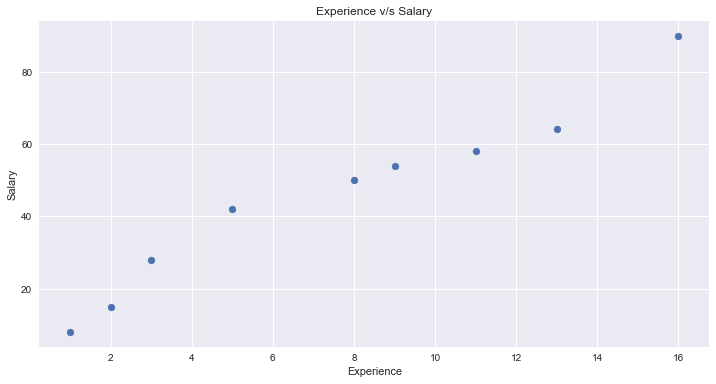

In [4]:
plt.figure(figsize=(12,6))
plt.scatter(df['Experience'], df['Salary'])
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Experience v/s Salary')

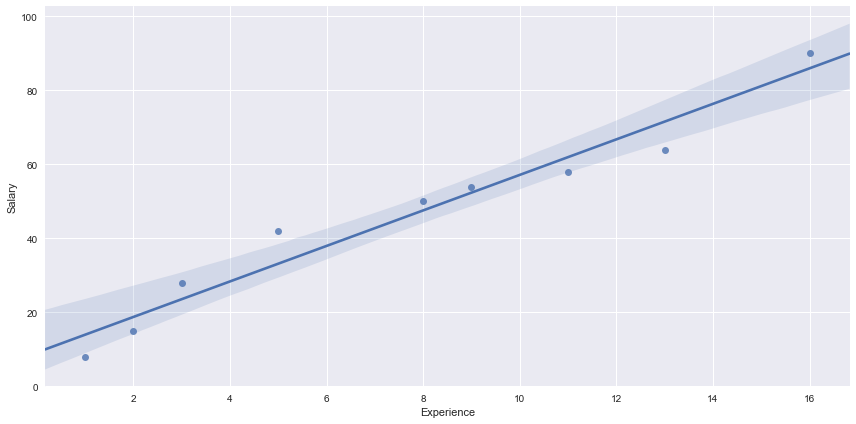

In [25]:
sns.lmplot(x='Experience', y='Salary', data=df, size=6, aspect=2)

### What is 'Best Fit Line' ?
Not exactly passes through all the data points but instead tries it's best to approximate them.

**Linear Regression** algorithm helps you to make this 'Best Fit Line' (by finding its equation).

### SSE and why we want to minimize it ?
SSE is the square of the difference between the predicted value and True value (i.e Error).<br>
We tend to minimize the Error because this is how we define it.<br>

<img src="images/sse.png" width=600 />

<img src="images/Screenshot_5.png" width=600 />

### How should we go about minimizing the error ?
Selecting a line which gives minimum value of SSE, which means finding values of **m** and **c** in the line equation which gives us minimum value of SSE.

![](images/sse_f.png)

To do the best fit of line intercept, we need to apply a linear regression model to reduce the SSE value as minimum as possible.

## Demo Time !!!

In [2]:
from sklearn.datasets import load_diabetes
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sklearn.metrics import mean_squared_error as mse

In [3]:
# Load the diabetes dataset
diabetes = load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# taking last 20 samples
diabetes_X_test = diabetes_X[-20:]
diabetes_y_test = diabetes.target[-20:]

# calculating min(), max()
dx_min, dx_max = diabetes_X_test.min(), diabetes_X_test.max()
dy_min, dy_max = diabetes_y_test.min(), diabetes_y_test.max()

# normalizing 
diabetes_X_test = (diabetes_X_test - dx_min)/(dx_max-dx_min)
diabetes_y_test = (diabetes_y_test - dy_min)/(dy_max-dy_min)

In [4]:
# plot linear regression
def plot_linearModel(m,c):
    y_pred = (m*diabetes_X_test)+c
    plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
    plt.plot(diabetes_X_test, y_pred, color='blue', linewidth=3)
    plt.xticks(())
    plt.yticks(())
    plt.xlim((0, 1.1))
    plt.ylim((0, 1.1))
    ys = np.array(list(zip(diabetes_y_test, y_pred))).reshape(-1)
    xs = np.repeat(diabetes_X_test, 2)
    for i in range(0, len(ys), 2):
        plt.plot(xs[i:i+2], ys[i:i+2], 'ro-')
    plt.show()
    print('Mean Square Error (MSE): {}'.format(mse(diabetes_y_test, y_pred)))

In [5]:
interact(plot_linearModel, m= (0.0,3.0), c= (-1.0,1.0));

interactive(children=(FloatSlider(value=1.5, description='m', max=3.0), FloatSlider(value=0.0, description='c'…

___Interpreting the coefficients

Linear Regression in 3-Dimension
Now its no longer a line, instead is a hyper plane.

<img src="images/Screenshot_6.png" width=400 />

Regression Evaluation Metrics

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are called **loss functions**, because we want to minimize them.

# Methods to find best fit line

### (a) Ordinary Least Square (OLS) Method

## In y= mx + b, 

![](images/ols_f.png)

where,
        bar(x) and bar(y) are average/mean value of x and y respectively. <br><br>
Ordinary Least Square method looks simple and computation is easy. But, this OLS method will only work for a univariate dataset which is single X variables and single Y variables. Multi-variate dataset contains a single Y variables set and multiple X variables sets, require us to use a machine learning algorithm called “Gradient Descent”.

### (b) Gradient Descent

Gradient descent algorithm’s main objective is to minimise the cost function. It is one of the best optimisation algorithms to minimise errors (difference of actual value and predicted value).

Let’s represent the hypothesis h, which is function or a learning algorithm.

![](images/Screenshot_7.png)

The goal is similar like the above operation that we did to find out a best fit of intercept line ‘y’ in the slope ‘m’. Using Gradient descent algorithm also, we will figure out a minimal cost function by applying various parameters for theta 0 and theta 1 and see the slope intercept until it reaches convergence.

In a real world example, it is similar to find out a best direction to take a step downhill.

![](images/gradientDescent.png)

We take a step towards the direction to get down. From the each step, you look out the direction again to get down faster and downhill quickly. The similar approach is using in this algorithm to minimise cost function.

We can measure the accuracy of our hypothesis function by using a cost function and the formula is

![](images/cost_f.png)

#### Gradient Descent for Linear Regression

![](images/Screenshot_1.png)

Why do we use partial derivative in the equation? Partial derivatives represents the rate of change of the functions as the variable change. In our case we change values for theta 0 and theta 1 and identifies the rate of change. To apply rate of change values for theta 0 and theta 1, the below are the equations for theta 0 and theta 1 to apply it on each epoch.

![](images/Screenshot_2.png)

To find the best minimum, repeat steps to apply various values for theta 0 and theta 1. In other words, repeat steps until convergence.

![](images/Screenshot_3.png)

   where alpha (a) is a learning rate / how big a step take to downhill.
    
![](images/Screenshot_4.png)


### Types of Gradient Descent Algorithms

There are three types of Gradient Descent Algorithms:

1. Batch Gradient Descent
2. Stochastic Gradient Descent
3. Mini-Batch Gradient Descent

### Other Regression Model
- Ridge Regression
- Lasso Regression
- K Nearest Neighbors
- Random Forest 
- Support Vector Machines

### Some Regression Datasets (on Kaggle)
- [wine quality](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)
- [boston dataset](data/boston.csv) 
- [movie rating](https://www.kaggle.com/nichen301/movie-data)

### Further Reading
   * [Model Evaluation regression metrics](http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) 
   * [Sklearn Linear models User Guide](http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)
   * [blog on ridge and lasso Regression (Highly recommended)](https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/)